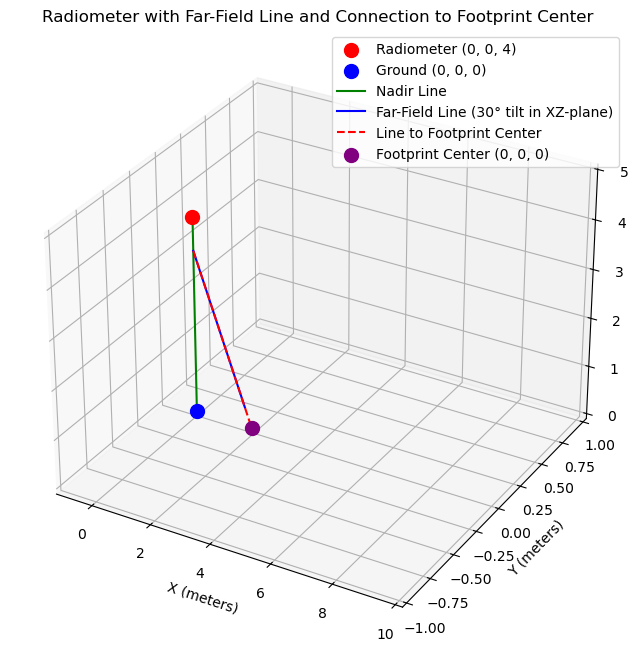

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_far_field(D, wavelength):
    return (2 * D**2) / wavelength

def plot_radiometer_with_extended_far_field():
    # Radiometer location (0, 0, h)
    h = 4  # Height of the radiometer
    radiometer_x = 0
    radiometer_y = 0
    radiometer_z = h  # This is the Z-coordinate, so (X, Y, Z) = (0, 0, 4)
    
    # Tilt angle from the Z-axis in the XZ-plane
    theta_deg = 30
    theta_rad = np.radians(theta_deg)
    
    # Length of the horn
    horn_length = 0.67  # in meters
    
    # Far-field calculation with updated D1
    D1 = 0.6  # Larger diameter in meters
    wavelength = 0.212  # Wavelength in meters
    far_field_distance = calculate_far_field(D1, wavelength)
    
    # Starting point of the far-field and the connecting line (after the horn)
    start_x = radiometer_x
    start_y = radiometer_y
    start_z = radiometer_z - horn_length
    
    # End point of the far-field line (tilted at 30 degrees from Z-axis in XZ-plane)
    far_field_end_x = start_x + np.sin(theta_rad) * far_field_distance
    far_field_end_y = 0  # Y remains 0 to stay on the XZ-plane
    far_field_end_z = start_z - np.cos(theta_rad) * far_field_distance

    # Calculate the point where the connecting line intersects the ground (Z = 0)
    ground_intersect_x = start_x + (start_z / np.cos(theta_rad)) * np.sin(theta_rad)
    ground_intersect_y = 0  # Y remains 0 to stay on the XZ-plane
    ground_intersect_z = 0  # Z = 0 (ground level)
    
    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the radiometer location at (0, 0, 4)
    ax.scatter(radiometer_x, radiometer_y, radiometer_z, color='red', s=100, label='Radiometer (0, 0, 4)')
    
    # Plot ground point directly beneath the radiometer (nadir)
    ax.scatter(radiometer_x, radiometer_y, 0, color='blue', s=100, label='Ground (0, 0, 0)')

    # Draw a line from nadir (ground) to the radiometer
    ax.plot([radiometer_x, radiometer_x], [radiometer_y, radiometer_y], [0, radiometer_z], 'g-', label='Nadir Line')
    
    # Draw the far-field line tilted at 30 degrees from Z-axis, in the XZ-plane
    ax.plot([start_x, far_field_end_x], 
            [start_y, far_field_end_y], 
            [start_z, far_field_end_z], 'b-', label='Far-Field Line (30° tilt in XZ-plane)')
    
    # Draw the line connecting the start point to the center of the ellipse footprint on the ground
    ax.plot([start_x, ground_intersect_x], 
            [start_y, ground_intersect_y], 
            [start_z, ground_intersect_z], 'r--', label='Line to Footprint Center')
    
    # Plot the center of the footprint
    ax.scatter(ground_intersect_x, ground_intersect_y, ground_intersect_z, color='purple', s=100, label='Footprint Center (0, 0, 0)')
    
    # Set labels and title
    ax.set_xlabel('X (meters)')
    ax.set_ylabel('Y (meters)')
    ax.set_zlabel('Z (meters)')
    ax.set_title('Radiometer with Far-Field Line and Connection to Footprint Center')
    
    # Set limits for better visualization
    ax.set_xlim([-1, 10])
    ax.set_ylim([-1, 1])
    ax.set_zlim([0, 5])

    ax.legend()
    plt.show()

# Plot the radiometer with the far-field line and connection to footprint center
plot_radiometer_with_extended_far_field()
